In [0]:
import os
import numpy as np
from PIL import Image
import cv2


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import ReLU
from tensorflow.keras import optimizers
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = np.load('drive/My Drive/train.npy')
test = np.load('drive/My Drive/test.npy')
train_labels = np.load('drive/My Drive/train_labels.npy')
test_labels = np.load('drive/My Drive/test_labels.npy')

In [0]:
IMG_SHAPE = (256, 256, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
                                               

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 2s 0us/step


In [0]:
from keras.applications.vgg16 import preprocess_input
train_2 = [ (np.dstack((x,x,x))) for x in train ]
test_2 = [ (np.dstack((x,x,x))) for x in test ]

Using TensorFlow backend.


In [0]:
(1-np.array(train_2))

array([[[[ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ]],

        ...,

        [[ 0.        ,  0.        ,  0

In [0]:
one_hot_labels_train = keras.utils.to_categorical(np.array(train_labels), num_classes=8)
one_hot_labels_test = keras.utils.to_categorical(np.array(test_labels), num_classes=8)

In [0]:
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [0]:
model_2 = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5, noise_shape=None, seed=None),
    Dense(512, activation='relu'),
    Dropout(0.5, noise_shape=None, seed=None),
    Dense(8, activation='sigmoid')
    # put 6(no. of output)
])

In [0]:
from tensorflow.keras.optimizers import RMSprop, SGD

opt = SGD(lr=0.000001)

model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
history = model_2.fit(np.array(train_2),one_hot_labels_train, epochs=50, batch_size=16, validation_data = (np.array(test_2),one_hot_labels_test), shuffle = True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1560 samples, validate on 476 samples
Epoch 1/50
1560/1560 [==============================] - 31s 20ms/sample - loss: 2.0987 - acc: 0.1660 - val_loss: 1.9527 - val_acc: 0.2647
Epoch 2/50
1560/1560 [==============================] - 23s 15ms/sample - loss: 1.9628 - acc: 0.2186 - val_loss: 1.8384 - val_acc: 0.3109
Epoch 3/50
1560/1560 [==============================] - 23s 15ms/sample - loss: 1.8483 - acc: 0.2513 - val_loss: 1.7143 - val_acc: 0.3676
Epoch 4/50
1560/1560 [==============================] - 23s 15ms/sample - loss: 1.7597 - acc: 0.3013 - val_loss: 1.6456 - val_acc: 0.3529
Epoch 5/50
1560/1560 [==============================] - 23s 15ms/sample - loss: 1.6590 - acc: 0.3385 - val_loss: 1.5374 - val_acc: 0.4202
Epoch 6/50
1560/1560 [==============================] - 23s 15ms/sample - loss: 1.6126 - acc: 0.3641 - val_loss: 1.4820 - val_acc: 0.4685
Epoch 7/50
1560/1560 [=========

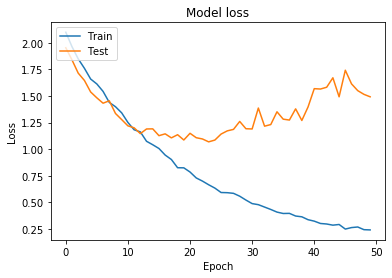

In [0]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

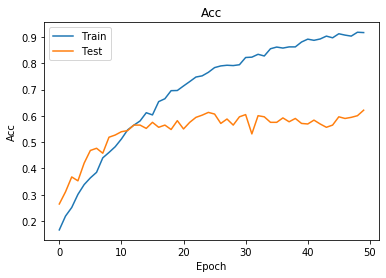

In [0]:
# Plot training & validation acc
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Acc')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model_2.predict(np.array(test_2))

In [0]:
C = tf.math.confusion_matrix(
    np.array(test_labels),
    np.argmax(y_pred, axis = -1),
    num_classes=8,
    weights=None,
    dtype=tf.dtypes.int64,
    name=None
)

In [21]:
with tf.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(C,feed_dict=None, session=None))

Confusion Matrix: 

 [[21 12  1  2  0  0  0  0]
 [ 6 46  1 19  0  0  0  0]
 [ 4  5 31  7  6  8  4  7]
 [ 5 15  2 35  1 11  3  0]
 [ 2  2  7  3 51  1  2  4]
 [ 0  2  5  8  1 49  1  6]
 [ 0  0  1  0  2  0 34  3]
 [ 0  0  3  1  1  4  2 29]]


In [0]:
from sklearn.preprocessing import normalize
with tf.Session():
  normed_matrix = normalize(tf.Tensor.eval(C,feed_dict=None, session=None), axis=1, norm='l1')

In [23]:
normed_matrix

array([[0.58333333, 0.33333333, 0.02777778, 0.05555556, 0.        ,
        0.        , 0.        , 0.        ],
       [0.08333333, 0.63888889, 0.01388889, 0.26388889, 0.        ,
        0.        , 0.        , 0.        ],
       [0.05555556, 0.06944444, 0.43055556, 0.09722222, 0.08333333,
        0.11111111, 0.05555556, 0.09722222],
       [0.06944444, 0.20833333, 0.02777778, 0.48611111, 0.01388889,
        0.15277778, 0.04166667, 0.        ],
       [0.02777778, 0.02777778, 0.09722222, 0.04166667, 0.70833333,
        0.01388889, 0.02777778, 0.05555556],
       [0.        , 0.02777778, 0.06944444, 0.11111111, 0.01388889,
        0.68055556, 0.01388889, 0.08333333],
       [0.        , 0.        , 0.025     , 0.        , 0.05      ,
        0.        , 0.85      , 0.075     ],
       [0.        , 0.        , 0.075     , 0.025     , 0.025     ,
        0.1       , 0.05      , 0.725     ]])